# The Sparks Foundation
# Data science & Business Analytics Internship
# Task1-Prediction using Supervised Machine Learning
# Predict the percentage scored based on the number of hours studied by a student
# Author-Nagarigeri Saicharan Reddy

In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#reading data
df=pd.read_csv("http://bit.ly/w-data")

In [3]:
#showing the number of rows and columns in the given data set
df.shape

(25, 2)

In [4]:
#display data
df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#checking for any missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualizing the data set

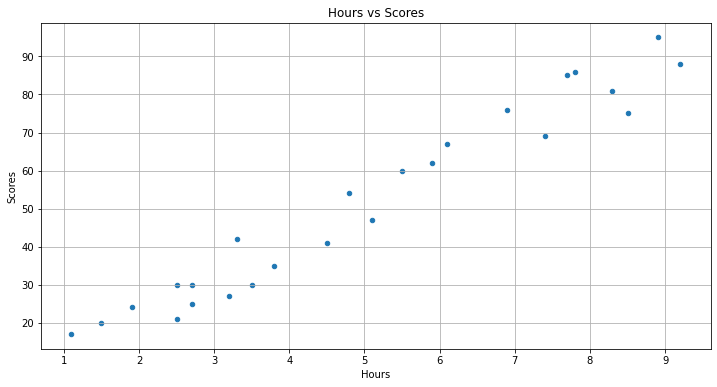

In [14]:
#plotting the graph
df.plot(kind='scatter',x='Hours',y='Scores');
plt.rcParams["figure.figsize"]=[12,6]
plt.title("Hours vs Scores")
plt.grid()
plt.show()

From this graph we can conclude there exists linear regression between hours studied and percentage scored


# Data Preparation

In [7]:
#using iloc function we divide the data into 2 arrays
x=df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [8]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [25]:
y


array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [9]:
#splitting data as training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,)

# Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Visualising the model

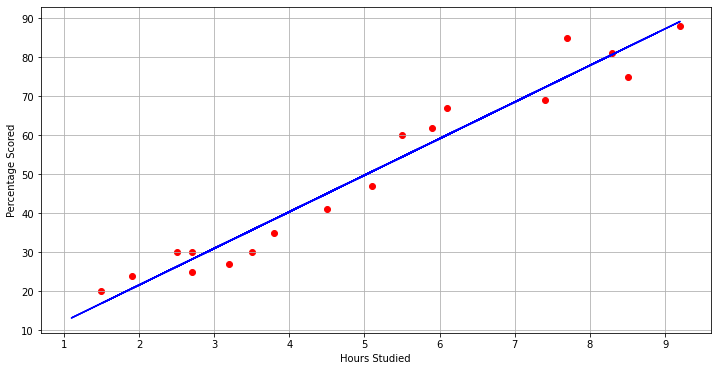

In [18]:
line=model.coef_*x + model.intercept_

#plotting for the training data
plt.rcParams["figure.figsize"]=[12,6]
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.grid()
plt.show()


# Make Predictions

In [24]:
print(x_test) #testing data in Hours
y_pred=model.predict(x_test)  #predicting the scores

[[4.8]
 [8.9]
 [7.8]
 [2.5]
 [6.9]
 [1.1]
 [3.3]]


In [20]:
#comparing actual vs predicted
y_test

array([[54],
       [95],
       [86],
       [21],
       [76],
       [17],
       [42]], dtype=int64)

In [23]:
y_pred

array([[47.90152753],
       [86.36465756],
       [76.04528121],
       [26.32464971],
       [67.60215511],
       [13.190898  ],
       [33.82965069]])

In [26]:
#testing with our own data
hours=9.25 
own_pred=model.predict([[hours]]) 
print("Predicted score of a person studied for",hours," hours is",own_pred[0])

Predicted score of a person studied for 9.25  hours is [89.64809549]


# Evaluating the model

In [28]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 7.19863994496275
